In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressors
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

 Reading the covid dataset provided in https://github.com/owid/covid-19-data/tree/master/public/data.

In [2]:
data = pd.read_csv("Downloads/owid-covid-data.csv")

In [3]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400995,ZWE,Africa,Zimbabwe,2024-05-08,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400996,ZWE,Africa,Zimbabwe,2024-05-09,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400997,ZWE,Africa,Zimbabwe,2024-05-10,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400998,ZWE,Africa,Zimbabwe,2024-05-11,266362.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


Dataset has 401000 entries, since the project aims to create a prediction model for "people_fully_vaccinated_per_hundred", we will not be using a big chunk of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401000 entries, 0 to 400999
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    401000 non-null  object 
 1   continent                                   381821 non-null  object 
 2   location                                    401000 non-null  object 
 3   date                                        401000 non-null  object 
 4   total_cases                                 362004 non-null  float64
 5   new_cases                                   389832 non-null  float64
 6   new_cases_smoothed                          388602 non-null  float64
 7   total_deaths                                339451 non-null  float64
 8   new_deaths                                  390196 non-null  float64
 9   new_deaths_smoothed                         388966 non-null  float64
 

(Below) Dataset has alot of inconsistent features

In [5]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.620040e+05,3.898320e+05,3.886020e+05,3.394510e+05,390196.000000,388966.000000,362004.000000,389832.000000,388602.000000,339451.000000,...,230692.000000,152678.000000,275212.000000,369548.000000,302214.000000,4.010000e+05,1.327800e+04,13278.000000,13278.000000,13278.000000
mean,7.616133e+06,8.430852e+03,8.457244e+03,9.128995e+04,75.526758,75.762938,115860.559943,128.338338,128.739324,933.652885,...,32.910772,50.790557,3.097304,73.709012,0.722530,1.290759e+08,5.567726e+04,9.772020,10.982103,1778.980390
std,4.501146e+07,2.355076e+05,8.880958e+04,4.622230e+05,1399.571905,525.158124,162769.225903,1518.897408,562.501610,1141.525499,...,13.573069,31.954383,2.548236,7.394859,0.148994,6.626995e+08,1.553584e+05,12.003341,24.513792,1989.433764
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.681000e+03,0.000000e+00,0.000000e+00,1.380000e+02,0.000000,0.000000,3090.103000,0.000000,0.000000,67.438000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.794000e+02,2.142500,-1.457500,124.000166
50%,8.232900e+04,0.000000e+00,1.500000e+01,1.414000e+03,0.000000,0.000000,34338.799000,0.000000,3.616000,435.074000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.812648e+03,8.150000,5.700000,1260.184150
75%,9.172130e+05,0.000000e+00,3.650000e+02,1.288100e+04,0.000000,3.571000,158890.923000,0.000000,63.434000,1501.050000,...,41.300000,82.502000,4.200000,79.460000,0.829000,2.830170e+07,3.895597e+04,15.027500,15.680000,2881.183925
max,7.754813e+08,4.423623e+07,6.319461e+06,7.049376e+06,103719.000000,14817.000000,771440.402000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,378.030000,10293.515000


Looking at the new cases per million values of some of the biggest countries in the world. Their means seem to be close but United Kingdom has a lot of outliers from the days which the pandemic was going bad. China seems to have less outliers but the ones it does have are larger in magnitude in comparison with the others.

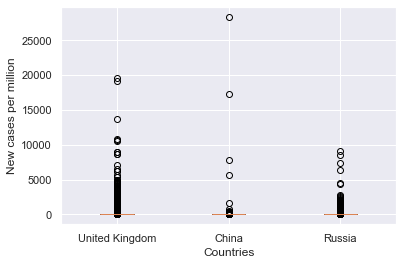

In [6]:
plt.boxplot([data[data['location']=='United Kingdom']['new_cases_per_million'], 
             data[data['location']=='China']['new_cases_per_million'], data[data['location']=='Russia']['new_cases_per_million']], labels=['United Kingdom','China','Russia'])
plt.xlabel('Countries')
plt.ylabel('New cases per million')
plt.savefig('newcases.png')
plt.show()

Total vaccination numbers for UK, US, China and Russia. The US and UK vaccination push started out at almost the same pace but the US vaccination numbers eventually petered off in comparison. The vaccination push in china started up a little later but outpaced both the US and UK. Russia is the lowest of them all.

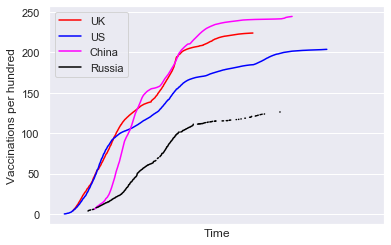

In [7]:
fig, ax = plt.subplots()
ax.plot(data[data['location']=='United Kingdom']['date'], data[data['location']=='United Kingdom']['total_vaccinations_per_hundred'], color='red')
ax.plot(data[data['location']=='United States']['date'], data[data['location']=='United States']['total_vaccinations_per_hundred'], color='blue')
ax.plot(data[data['location']=='China']['date'], data[data['location']=='China']['total_vaccinations_per_hundred'], color='magenta')
ax.plot(data[data['location']=='Russia']['date'], data[data['location']=='Russia']['total_vaccinations_per_hundred'], color='black')
plt.xlabel('Time')
ax.set_xticks([])
plt.ylabel('Vaccinations per hundred')
plt.legend(['UK','US','China','Russia'])
#plt.savefig("total_vac.png")
plt.show()

Unfortunately, more than 3 milion people died as a result of the pandemic. The number of deaths was increasing exponentially at one point.

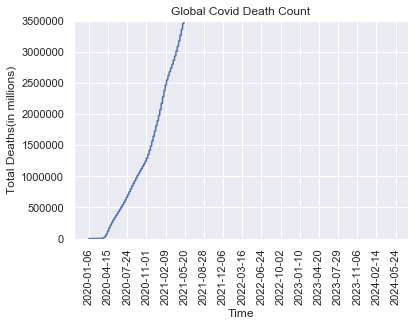

In [8]:
fig, ax = plt.subplots()
ax.plot(data[data['location']=='World']['date'], data[data['location']=='World']['total_deaths'])
ax.set_xticks([x for x in range(1,data[data['location']=='World']['date'].shape[0],100)])
plt.xticks(rotation=90)
plt.ylim((0, 3500000))
plt.xlabel('Time')
plt.ylabel('Total Deaths(in millions)')
plt.title('Global Covid Death Count')
plt.savefig('world.png')
plt.show()

Looking at the total cases per million for 5 continents. Africa and Asia seems to have way less cases than Europe and American continents. The reason may be incomplete data in the case of africa and also china early on. 

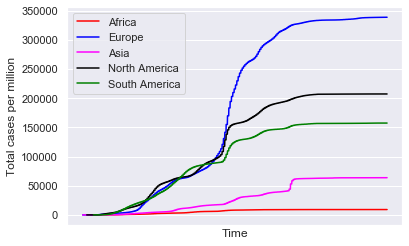

In [9]:
fig, ax = plt.subplots()
ax.plot(data[data['location']=='Africa']['date'], data[data['location']=='Africa']['total_cases_per_million'], color='red')
ax.plot(data[data['location']=='Europe']['date'], data[data['location']=='Europe']['total_cases_per_million'], color='blue')
ax.plot(data[data['location']=='Asia']['date'], data[data['location']=='Asia']['total_cases_per_million'], color='magenta')
ax.plot(data[data['location']=='North America']['date'], data[data['location']=='North America']['total_cases_per_million'], color='black')
ax.plot(data[data['location']=='South America']['date'], data[data['location']=='South America']['total_cases_per_million'], color='green')
plt.xlabel('Time')
ax.set_xticks([])
plt.ylabel('Total cases per million')
plt.legend(['Africa','Europe','Asia','North America','South America'])
plt.savefig("continents.png")
plt.show()

1) iso_code(3 letter code for each country) is dropped because the location feature already provides similar info.

2) smoothed versions of cases,deaths,tests and vaccinations are dropped because they are closely correlated with normal versions.

3) weekly_icu_admission and weekly_hosp_admissions are dropped because the amount of data in these columnns is small/negligible.

4) aged_70_older is dropped because the aged_65_older feature is closely correlated.

In [10]:
data.drop(labels=['iso_code','new_deaths_smoothed','new_cases_smoothed','new_cases_smoothed_per_million',
                   'new_deaths_smoothed_per_million', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
                      'new_vaccinations_smoothed','new_vaccinations_smoothed_per_million', 'aged_70_older',
                  'weekly_icu_admissions','weekly_icu_admissions_per_million','weekly_hosp_admissions', 
                  'weekly_hosp_admissions_per_million'], axis=1,inplace=True)
data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400995,Africa,Zimbabwe,2024-05-08,266362.0,0.0,5740.0,0.0,16320.662,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400996,Africa,Zimbabwe,2024-05-09,266362.0,0.0,5740.0,0.0,16320.662,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400997,Africa,Zimbabwe,2024-05-10,266362.0,0.0,5740.0,0.0,16320.662,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400998,Africa,Zimbabwe,2024-05-11,266362.0,0.0,5740.0,0.0,16320.662,0.0,351.704,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


There are null values even in continent column!

In [11]:
data[data.isnull()==True]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data[data['continent'].isnull()==True]

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1590,NaN,Africa,2020-01-05,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1591,NaN,Africa,2020-01-06,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1592,NaN,Africa,2020-01-07,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1593,NaN,Africa,2020-01-08,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
1594,NaN,Africa,2020-01-09,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396225,NaN,World,2024-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
396226,NaN,World,2024-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
396227,NaN,World,2024-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
396228,NaN,World,2024-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


In [13]:
data[data['population'].isnull()==True] #No null values

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


In [14]:
data.dropna(subset=['continent'],inplace=True)

Since our goal is to predict "people_fully_vaccinated_per_hundred", we need to see the date which this feature is provided for the first time. We see that the first entry is from the US on the 13th of December, 2020.

In [15]:
data[data['people_fully_vaccinated_per_hundred'].isnull()==False][['location','date']].sort_values('date',ascending=True)

,location,date
377860,United States,2020-12-13
377861,United States,2020-12-14
377862,United States,2020-12-15
377863,United States,2020-12-16
377864,United States,2020-12-17
...,...,...
54095,Bulgaria,2024-05-23
201817,Lithuania,2024-05-24
212176,Malaysia,2024-05-24
162045,India,2024-05-24


When we look at the date when the "people_vaccinated" and "total_vaccinations" features are provided together for the first time, we see that day is 2 December, 2020.

Since "fully vaccinated" means someone who took 2 doses of vaccine, we can fill in the data before 13 December, with the formula:

$$
people\_fully\_vaccinated=total\_vaccinations - people\_vaccinated
$$

In [16]:
data[(data['people_vaccinated'].isnull()==False) & (data['total_vaccinations'].isnull()==False)].sort_values('date',ascending=True)[['date','location','people_vaccinated','total_vaccinations']]

,date,location,people_vaccinated,total_vaccinations
265480,2020-12-02,Norway,0.000000e+00,0.000000e+00
191010,2020-12-04,Latvia,1.000000e+00,1.000000e+00
191013,2020-12-07,Latvia,2.000000e+00,2.000000e+00
265486,2020-12-08,Norway,5.000000e+00,5.000000e+00
265487,2020-12-09,Norway,6.000000e+00,6.000000e+00
...,...,...,...,...
201816,2024-05-23,Lithuania,1.958284e+06,4.604775e+06
201817,2024-05-24,Lithuania,1.958284e+06,4.604778e+06
212176,2024-05-24,Malaysia,2.813820e+07,7.265569e+07
89097,2024-05-24,Czechia,6.981981e+06,1.904687e+07


Since we have information about the vaccination numbers starting from the 2nd of December, we drop the data before that date.

Also since the dataset already has the population and  the per million/per thousand/per hundred versions of some features, we can drop the original features, such as total cases and new cases.

Now we have 302458 examples.

In [17]:
vaccinated=data[data['date'] >= '2020-12-02']
vaccinated.drop(['total_cases','new_cases','total_deaths','new_deaths','icu_patients','hosp_patients','new_tests',
                 'total_tests','tests_per_case'],axis=1, inplace=True)
vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302458 entries, 332 to 400999
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   302458 non-null  object 
 1   location                                    302458 non-null  object 
 2   date                                        302458 non-null  object 
 3   total_cases_per_million                     285934 non-null  float64
 4   new_cases_per_million                       293070 non-null  float64
 5   total_deaths_per_million                    274751 non-null  float64
 6   new_deaths_per_million                      293431 non-null  float64
 7   reproduction_rate                           142093 non-null  float64
 8   icu_patients_per_million                    31202 non-null   float64
 9   hosp_patients_per_million                   32442 non-null   float64

Filling in the empty "people_fully_vaccinated" data entries, given the "total_vaccinations" and "people_vaccinated" data values are provided. Thereafter, we fill the per_hundred version of the people fully vaccinated using the population numbers.

In [18]:
vaccinated['people_fully_vaccinated'] = vaccinated.apply(
    lambda row: row.total_vaccinations - row.people_vaccinated 
    if np.isnan(row.people_fully_vaccinated) else row.people_fully_vaccinated, axis=1)

In [19]:
vaccinated['people_fully_vaccinated_per_hundred'] = vaccinated.apply(
    lambda row: (row.people_fully_vaccinated / row.population)*100
    if np.isnan(row.people_fully_vaccinated_per_hundred) else row.people_fully_vaccinated_per_hundred, axis=1)

The count of non-null examples in people_fully_vaccinated_per_hundred column increased from 62631 to 65533.

In [20]:
vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302458 entries, 332 to 400999
Data columns (total 44 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   302458 non-null  object 
 1   location                                    302458 non-null  object 
 2   date                                        302458 non-null  object 
 3   total_cases_per_million                     285934 non-null  float64
 4   new_cases_per_million                       293070 non-null  float64
 5   total_deaths_per_million                    274751 non-null  float64
 6   new_deaths_per_million                      293431 non-null  float64
 7   reproduction_rate                           142093 non-null  float64
 8   icu_patients_per_million                    31202 non-null   float64
 9   hosp_patients_per_million                   32442 non-null   float64

It still has lots of null values, we can fill some of them with backfill method. But we need to separate the countries from each other to execute this operation correctly. By using backfill limit as 1, we don't fill consecutive null values, which may lead the model to give wrong results.

In [21]:
for country in vaccinated['location'].unique():
    country_vaccine = vaccinated[vaccinated['location'] == country]
    country_vaccine.bfill(axis='rows',limit=1,inplace=True)
    vaccinated[vaccinated['location'] == country] = country_vaccine

We can also drop the vaccination features because we have their per hundred versions.

people_fully_vaccinated_per_hundred has 81942 non-null values now.

In [22]:
vaccinated.drop(['total_vaccinations','people_vaccinated','people_fully_vaccinated'],axis=1,inplace=True)
vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302458 entries, 332 to 400999
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   302458 non-null  object 
 1   location                                    302458 non-null  object 
 2   date                                        302458 non-null  object 
 3   total_cases_per_million                     285948 non-null  float64
 4   new_cases_per_million                       293082 non-null  float64
 5   total_deaths_per_million                    274783 non-null  float64
 6   new_deaths_per_million                      293440 non-null  float64
 7   reproduction_rate                           142110 non-null  float64
 8   icu_patients_per_million                    32598 non-null   float64
 9   hosp_patients_per_million                   33453 non-null   float64

Since we have filled in the blanks enough, we can drop the entries with null for "people_fully_vaccinated_per_hundred".

In [23]:
vaccinated.dropna(axis=0,subset=['people_fully_vaccinated_per_hundred'],inplace=True)
vaccinated

,continent,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
413,Asia,Afghanistan,2021-02-21,1351.949,2.723,59.131,0.122,0.84,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
414,Asia,Afghanistan,2021-02-22,1351.949,0.000,59.131,0.000,0.85,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
419,Asia,Afghanistan,2021-02-27,1351.949,0.000,59.131,0.000,0.91,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
420,Asia,Afghanistan,2021-02-28,1354.623,2.675,59.399,0.267,0.93,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
435,Asia,Afghanistan,2021-03-15,1361.213,0.000,59.739,0.000,1.11,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400412,Africa,Zimbabwe,2022-10-03,15778.707,0.000,343.248,0.000,1.03,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400413,Africa,Zimbabwe,2022-10-04,15778.707,0.000,343.248,0.000,1.02,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400414,Africa,Zimbabwe,2022-10-05,15778.707,0.000,343.248,0.000,1.00,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
400417,Africa,Zimbabwe,2022-10-08,15778.707,0.000,343.248,0.000,0.94,NaN,NaN,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [24]:
vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81942 entries, 413 to 400418
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   continent                                   81942 non-null  object 
 1   location                                    81942 non-null  object 
 2   date                                        81942 non-null  object 
 3   total_cases_per_million                     76273 non-null  float64
 4   new_cases_per_million                       76462 non-null  float64
 5   total_deaths_per_million                    75580 non-null  float64
 6   new_deaths_per_million                      76462 non-null  float64
 7   reproduction_rate                           62263 non-null  float64
 8   icu_patients_per_million                    22156 non-null  float64
 9   hosp_patients_per_million                   22558 non-null  float64
 10  total_t

The "handwashing_facilities", "hosp_patients_per_million" and "icu_patients_per_million" columns still have lots of null values. We need to fill +- 60000 rows to use them in model, which is why we dropping them. The others can be filled because they have more non-null values and require much less filling.

In [25]:
vaccinated.drop(axis=1, labels=['handwashing_facilities','hosp_patients_per_million','icu_patients_per_million'],inplace=True)

The remaining null values filled with mean of the each column.

test_units is dropped because its not relevant to our goal.

In [26]:
vaccinated=vaccinated.fillna(vaccinated.mean())
vaccinated.drop("tests_units",axis=1,inplace=True)
vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81942 entries, 413 to 400418
Data columns (total 37 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   continent                                   81942 non-null  object 
 1   location                                    81942 non-null  object 
 2   date                                        81942 non-null  object 
 3   total_cases_per_million                     81942 non-null  float64
 4   new_cases_per_million                       81942 non-null  float64
 5   total_deaths_per_million                    81942 non-null  float64
 6   new_deaths_per_million                      81942 non-null  float64
 7   reproduction_rate                           81942 non-null  float64
 8   total_tests_per_thousand                    81942 non-null  float64
 9   new_tests_per_thousand                      81942 non-null  float64
 10  positiv

In [27]:
vaccinated.reset_index(drop=True, inplace=True)
vaccinated

,continent,location,date,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,total_tests_per_thousand,new_tests_per_thousand,...,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2021-02-21,1351.949,2.723,59.131,0.122,0.84,1358.925434,4.483035,...,13.912833,33.824996,0.5,64.83,0.511,41128772.0,83537.444349,13.041689,13.667219,2354.913359
1,Asia,Afghanistan,2021-02-22,1351.949,0.000,59.131,0.000,0.85,1358.925434,4.483035,...,13.912833,33.824996,0.5,64.83,0.511,41128772.0,83537.444349,13.041689,13.667219,2354.913359
2,Asia,Afghanistan,2021-02-27,1351.949,0.000,59.131,0.000,0.91,1358.925434,4.483035,...,13.912833,33.824996,0.5,64.83,0.511,41128772.0,83537.444349,13.041689,13.667219,2354.913359
3,Asia,Afghanistan,2021-02-28,1354.623,2.675,59.399,0.267,0.93,1358.925434,4.483035,...,13.912833,33.824996,0.5,64.83,0.511,41128772.0,83537.444349,13.041689,13.667219,2354.913359
4,Asia,Afghanistan,2021-03-15,1361.213,0.000,59.739,0.000,1.11,1358.925434,4.483035,...,13.912833,33.824996,0.5,64.83,0.511,41128772.0,83537.444349,13.041689,13.667219,2354.913359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81937,Africa,Zimbabwe,2022-10-03,15778.707,0.000,343.248,0.000,1.03,1358.925434,4.483035,...,1.600000,30.700000,1.7,61.49,0.571,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81938,Africa,Zimbabwe,2022-10-04,15778.707,0.000,343.248,0.000,1.02,1358.925434,4.483035,...,1.600000,30.700000,1.7,61.49,0.571,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81939,Africa,Zimbabwe,2022-10-05,15778.707,0.000,343.248,0.000,1.00,1358.925434,4.483035,...,1.600000,30.700000,1.7,61.49,0.571,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81940,Africa,Zimbabwe,2022-10-08,15778.707,0.000,343.248,0.000,0.94,1358.925434,4.483035,...,1.600000,30.700000,1.7,61.49,0.571,16320539.0,83537.444349,13.041689,13.667219,2354.913359


The heatmap of correlations shows that there are some features with very high correlation. To get rid of this dependency, I dropped; total_vaccinations_per_hundred, people_vaccinated_per_hundred , median_age ,human_development_index and total_deaths_per_million.

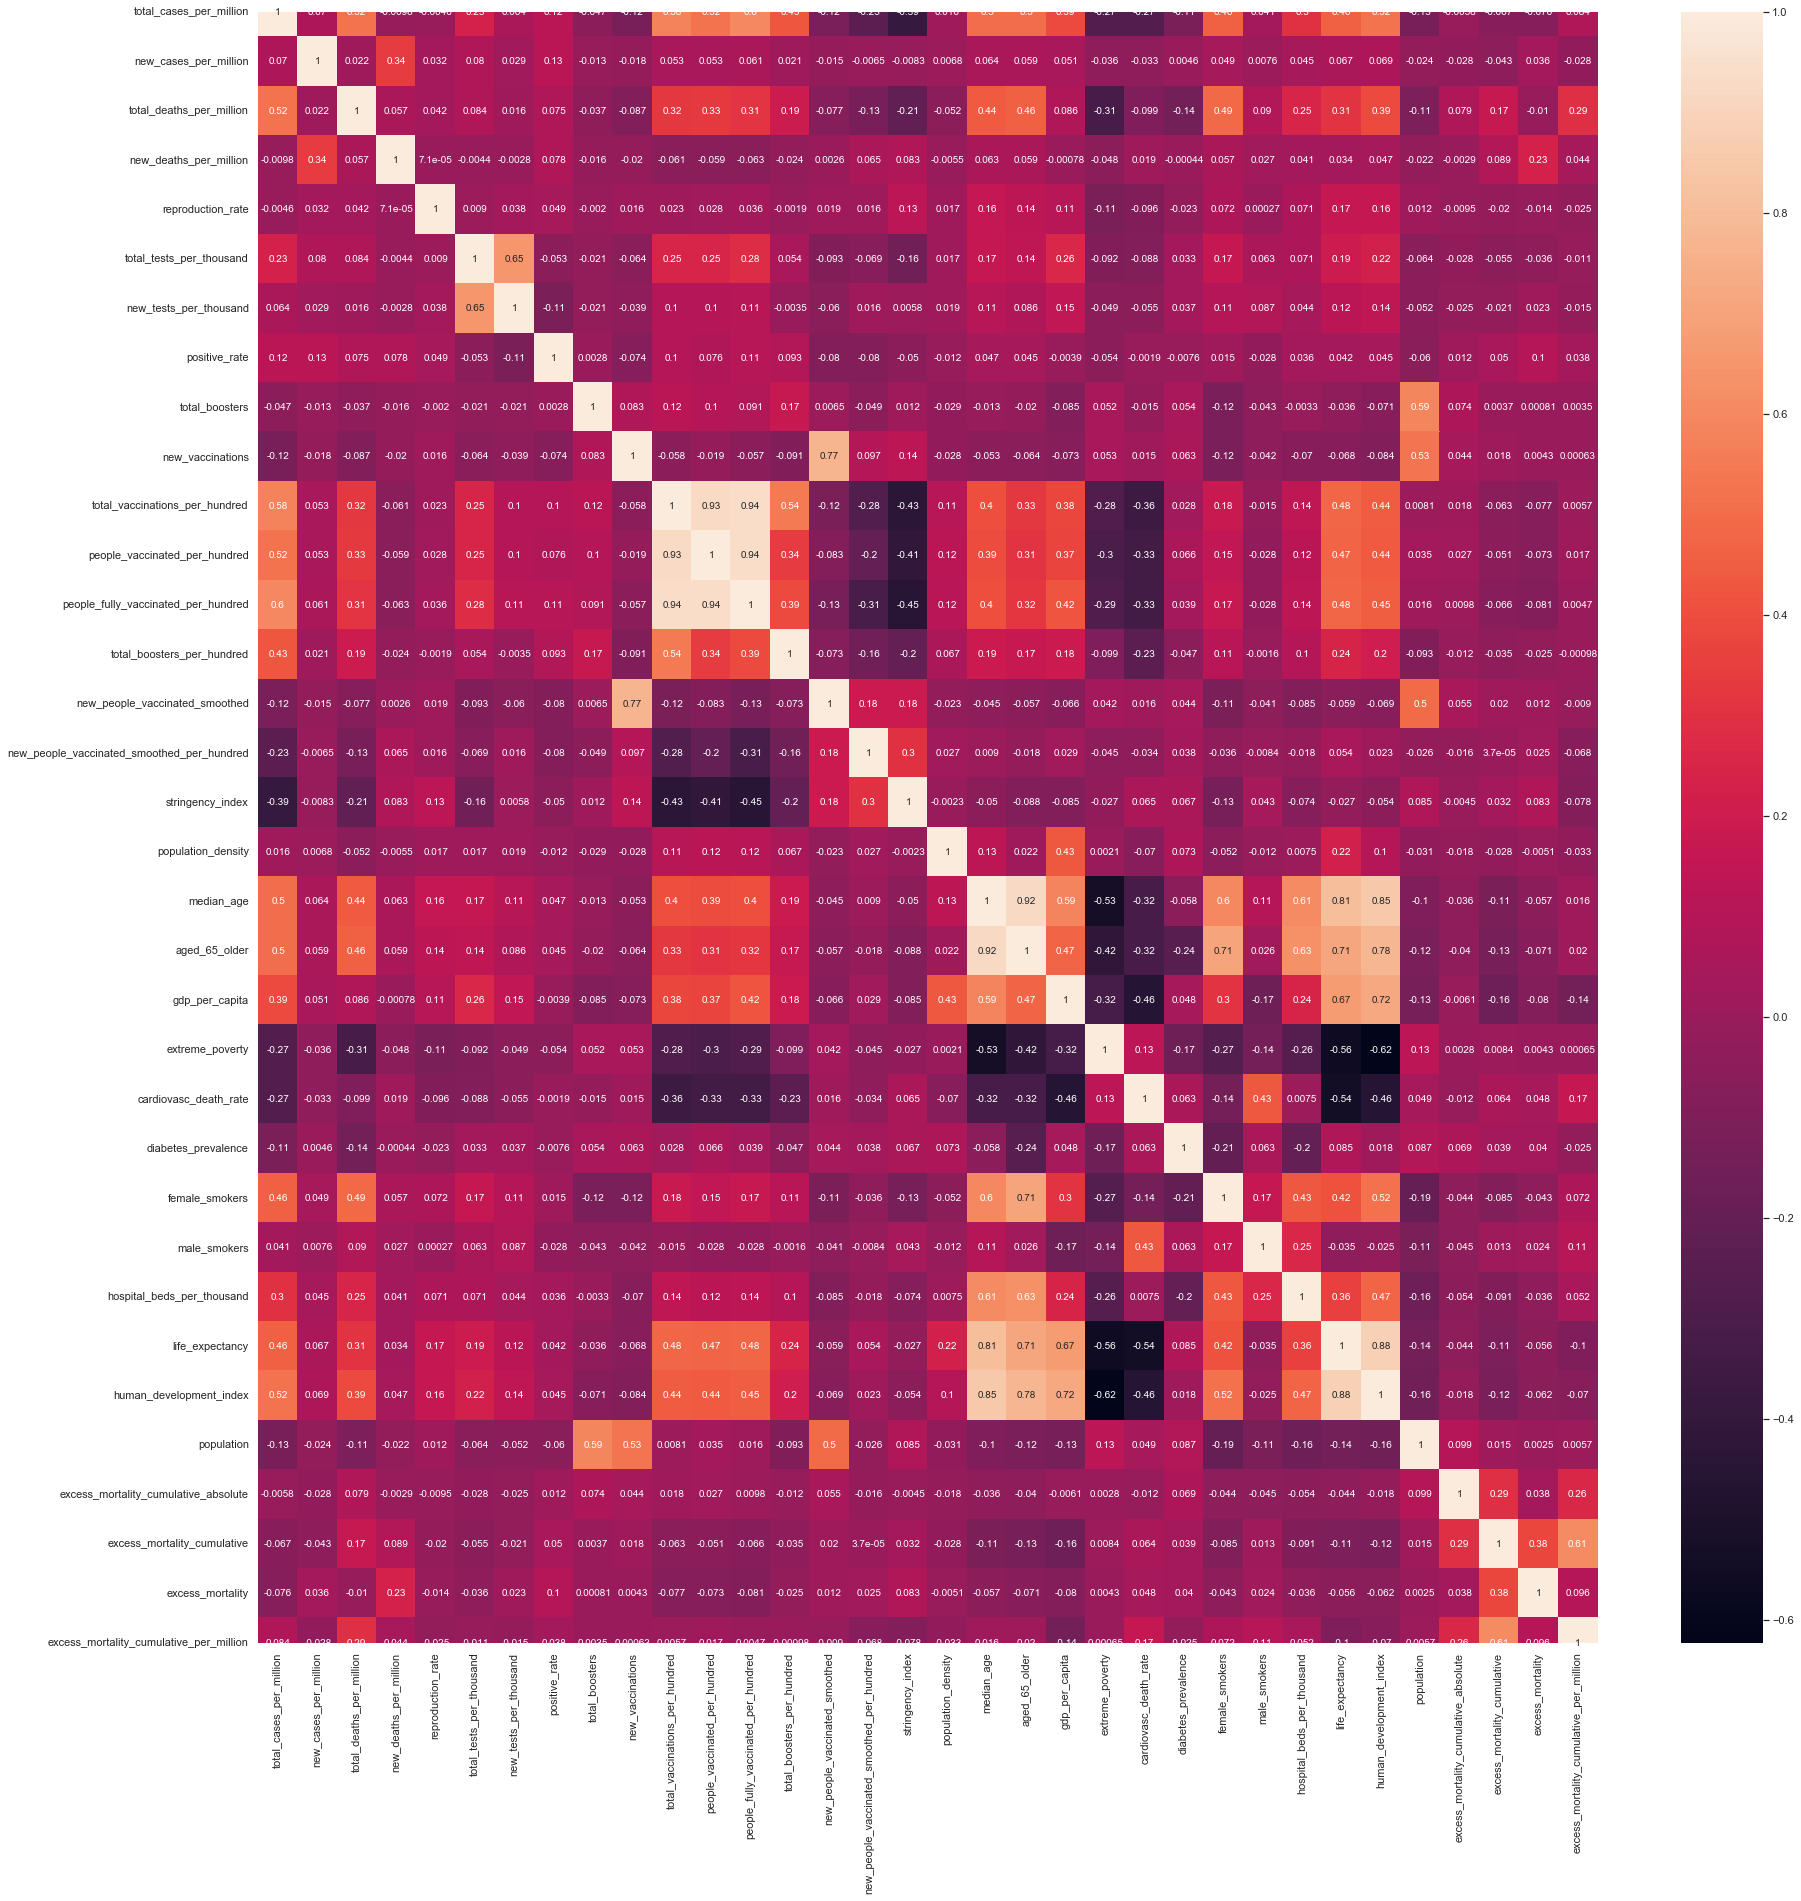

In [28]:
fig, ax=plt.subplots(figsize=(30,30))
sns.heatmap(vaccinated.corr(), annot=True, ax=ax)
plt.show()

In [29]:
y = vaccinated['people_fully_vaccinated_per_hundred']
X = vaccinated.drop('people_fully_vaccinated_per_hundred',axis=1)
X.drop(["people_vaccinated_per_hundred",'median_age','human_development_index',
        'total_deaths_per_million',"total_vaccinations_per_hundred"],axis=1,inplace=True)
X

,continent,location,date,total_cases_per_million,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_tests_per_thousand,new_tests_per_thousand,positive_rate,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2021-02-21,1351.949,2.723,0.122,0.84,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
1,Asia,Afghanistan,2021-02-22,1351.949,0.000,0.000,0.85,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
2,Asia,Afghanistan,2021-02-27,1351.949,0.000,0.000,0.91,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
3,Asia,Afghanistan,2021-02-28,1354.623,2.675,0.267,0.93,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
4,Asia,Afghanistan,2021-03-15,1361.213,0.000,0.000,1.11,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81937,Africa,Zimbabwe,2022-10-03,15778.707,0.000,0.000,1.03,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81938,Africa,Zimbabwe,2022-10-04,15778.707,0.000,0.000,1.02,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81939,Africa,Zimbabwe,2022-10-05,15778.707,0.000,0.000,1.00,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81940,Africa,Zimbabwe,2022-10-08,15778.707,0.000,0.000,0.94,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359


In order to feed categorical data to a machine learning model, we need to encode it. Continent, Location and Date columns are encoded. In order to match/test countries after the prediction, X is copied.

In [30]:
encoder = LabelEncoder()
X_transformed=X.copy()
X_transformed['continent'] = encoder.fit_transform(X_transformed['continent'])
X_transformed['date'] = encoder.fit_transform(X_transformed['date'])
X_transformed['location'] = encoder.fit_transform(X_transformed['location'])
X_transformed

,continent,location,date,total_cases_per_million,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_tests_per_thousand,new_tests_per_thousand,positive_rate,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,1,0,80,1351.949,2.723,0.122,0.84,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
1,1,0,81,1351.949,0.000,0.000,0.85,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
2,1,0,86,1351.949,0.000,0.000,0.91,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
3,1,0,87,1354.623,2.675,0.267,0.93,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
4,1,0,102,1361.213,0.000,0.000,1.11,1358.925434,4.483035,0.116666,...,9.59,13.912833,33.824996,0.5,64.83,41128772.0,83537.444349,13.041689,13.667219,2354.913359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81937,0,222,669,15778.707,0.000,0.000,1.03,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81938,0,222,670,15778.707,0.000,0.000,1.02,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81939,0,222,671,15778.707,0.000,0.000,1.00,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359
81940,0,222,674,15778.707,0.000,0.000,0.94,1358.925434,4.483035,0.116666,...,1.82,1.600000,30.700000,1.7,61.49,16320539.0,83537.444349,13.041689,13.667219,2354.913359


Since the dataset is time-series, if we want to make a prediction at some day t, the data should be trained with the days before t, not with the data after it. In order to split the data efficiently, we store the number of examples of each country with the encoded location. In the for loop, it checks that, if there are 5 or more examples from the country the current country. If the answer is true, it carries the last 20% of the data to the test set. This ensures that the test set is representative of the most recent data points.

Additionally, for each country with sufficient data (i.e., at least 5 examples), the code calculates the number of data points to add to the test set as `(v // 5)`, which corresponds to the last 20% of the country's data. The process can be summarized by the formula:

$$
\text{Number of test examples} = \left\lfloor \frac{\text{Number of examples from the country}}{5} \right\rfloor
$$

where \( v \) is the number of examples from the country.

For example, if a country has 20 data points, the code will add the last 4 data points (20%) to the test set. This helps to create a robust time-series test set for evaluating the model's performance.

In [31]:
countries = dict(X_transformed['location'].value_counts())
X_test=pd.DataFrame(columns=X_transformed.columns)
y_test=pd.Series()
for k,v in countries.items():
    if v >= 5:
        add = X_transformed[X_transformed['location']==k].sort_values('date',ascending=True)[-(v//5):]
        X_transformed.drop(add.index,axis=0,inplace=True)
        X_test=X_test.append(add)
        y_test=y_test.append(y.loc[add.index])
        y.drop(add.index,axis=0,inplace=True)

In [32]:
print(f' X shape: {X_transformed.shape}')
print(f' X_test shape: {X_test.shape}')
print(f' y shape: {y.shape}')
print(f' y_test shape: {y_test.shape}')

 X shape: (65638, 31)
 X_test shape: (16304, 31)
 y shape: (65638,)
 y_test shape: (16304,)


In [33]:
X_transformed.reset_index(drop=True, inplace=True)
y.reset_index(drop=True,inplace=True)

In order to do cross validation for a time-series, we need to pass a predefined split.

test_fold is a list that holds what example will be in each split's validation set. -1 means always using it for training set.

In [34]:
countries = dict(X_transformed['location'].value_counts())
test_fold=[-1]*X_transformed.shape[0]
print(len(test_fold))

65638


Using the same ratio, 80% training and 20% validation for countries with more than or equal to 5 examples, we can use 13035 examples in validation set. Since I want to use a 5-fold cross validation, 2607-2608 will be the number of examples in each fold.

In [35]:
j=0
for i in countries.values():
    if i>=5:
        j=j+(i//5)
print(j)
j//5

13035


2607

In [36]:
fold=0
m=0
for k,v in countries.items(): #checking the number of examples in split
    if v >= 5:
        if m<2608:
            validate = X_transformed[X_transformed['location']==k].sort_values('date',ascending=True)[-(v//5):].index
            for i in validate:
                test_fold[i]=fold
            m+=len(validate)
        else:
            m=0
            fold+=1
cv=PredefinedSplit(test_fold)

Standardizing transformed features

In [37]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X_transformed)
X_scaled_test=scaler.transform(X_test)

Initializing the selected model.

In [44]:
model=xgb.XGBRegressor(max_depth=5,learning_rate=0.1, n_estimators=700, random_state=0, objective='reg:squarederror')

Fitting the model and predicting test set. $R^2$ of it is very good.

In [45]:
model.fit(X_transformed, y)
prediction = model.predict(X_scaled_test)
print(f"R2 score of the model ---> {r2_score(y_test, prediction)}")
print(f"Mean squared error of the model ---> {mean_squared_error(y_test, prediction)}")

R2 score of the model ---> 0.9208012691361481
Mean squared error of the model ---> 49.75052757964365


Comparing actual v prediction.

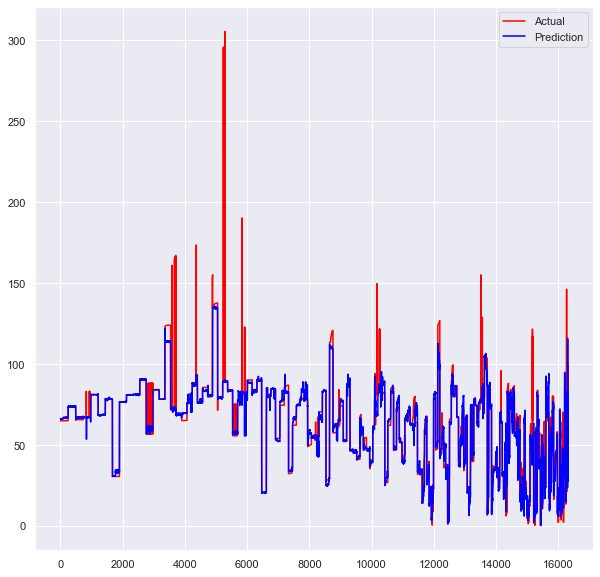

In [46]:
plt.figure(figsize=(10,10))
plt.plot(y_test.values, color='red')
plt.plot(prediction, color='blue')
plt.legend(['Actual','Prediction'])
plt.savefig("predictions.png")
plt.show()

Predictions are decent - there are, however, some substantial deviations from the actual

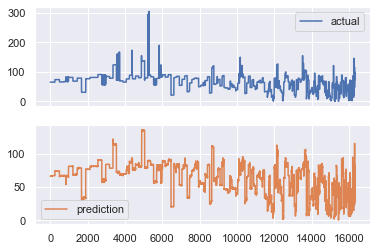

In [47]:
pd.DataFrame({'actual':y_test.values, 'prediction':prediction}).plot(subplots=True)
plt.show()

Checking what the worst prediction was. idxmax gives the index of the maximum element.

In [48]:
mse = np.square(y_test-prediction)
print(f"maximum error-->{mse.max()}\nindex of it--->{mse.idxmax()}")

maximum error-->46657.709215283
index of it--->17347


Looking at the features of the worst prediction. It has the location code 49

In [49]:
X_test.loc[17347]

continent                                                3
location                                                49
date                                                   920
total_cases_per_million                          99319.866
new_cases_per_million                                  0.0
new_deaths_per_million                                 0.0
reproduction_rate                                 0.969802
total_tests_per_thousand                       1358.925434
new_tests_per_thousand                            4.483035
positive_rate                                     0.116666
total_boosters                                   8748952.0
new_vaccinations                                      29.0
total_boosters_per_hundred                           78.03
new_people_vaccinated_smoothed                       467.0
new_people_vaccinated_smoothed_per_hundred           0.004
stringency_index                                 42.484648
population_density                                 110.4

By looking at the label encoder, we can access the country with code 49, its Cuba.

In [50]:
encoder.classes_[49]

'Cuba'

It predicted only a little above a quarter of the actual.

In [51]:
worst=mse.argmax()
print(f'actual---> {y_test.iloc[worst]}\nprediction --->{prediction[worst]}')

actual---> 305.5549589830647
prediction --->89.5510025024414


Could be because some of the new death/new cases entries are empty(0) and some of the features(total tests, new tests, etc.) seem to be filled using mean values.

In [54]:
vaccinated[(vaccinated['location']=='Cuba') & (vaccinated['date']>='2021-02-01')][['location','date','total_cases_per_million','new_cases_per_million','new_deaths_per_million','total_tests_per_thousand','new_tests_per_thousand','people_fully_vaccinated_per_hundred']]

,location,date,total_cases_per_million,new_cases_per_million,new_deaths_per_million,total_tests_per_thousand,new_tests_per_thousand,people_fully_vaccinated_per_hundred
16622,Cuba,2021-05-30,12494.160,736.252,7.135,384.570000,1.991000,1.31
16623,Cuba,2021-05-31,12494.160,0.000,0.000,386.389000,1.819000,1.31
16624,Cuba,2021-06-01,12494.160,0.000,0.000,388.291000,1.902000,1.33
16625,Cuba,2021-06-02,12494.160,0.000,0.000,390.301000,2.010000,1.35
16626,Cuba,2021-06-03,12494.160,0.000,0.000,392.468000,2.168000,1.37
...,...,...,...,...,...,...,...,...
17421,Cuba,2024-03-22,99325.663,0.000,0.000,1358.925434,4.483035,89.65
17422,Cuba,2024-03-28,99325.752,0.000,0.000,1358.925434,4.483035,89.65
17423,Cuba,2024-03-29,99325.752,0.000,0.000,1358.925434,4.483035,89.65
17424,Cuba,2024-04-11,99325.931,0.000,0.000,1358.925434,4.483035,89.67


Prediction for the UK seems perfect when rounded to 2 decimals.

In [57]:
UK = pd.DataFrame(columns=['date','actual','prediction'])
UK[['date','actual']] = vaccinated[vaccinated['location']=='United Kingdom'].sort_values('date',ascending=True)[['date','people_fully_vaccinated_per_hundred']]
for i in UK.index.values[-15:]:
    UK.loc[i,'prediction']=y_test[i]
UK

,date,actual,prediction
76997,2021-01-09,0.58,NaN
76998,2021-01-10,0.58,NaN
76999,2021-01-11,0.61,NaN
77000,2021-01-12,0.63,NaN
77001,2021-01-13,0.65,NaN
...,...,...,...
77603,2022-09-07,75.18,75.18
77604,2022-09-08,75.18,75.18
77605,2022-09-09,75.18,75.18
77606,2022-09-10,75.19,75.19


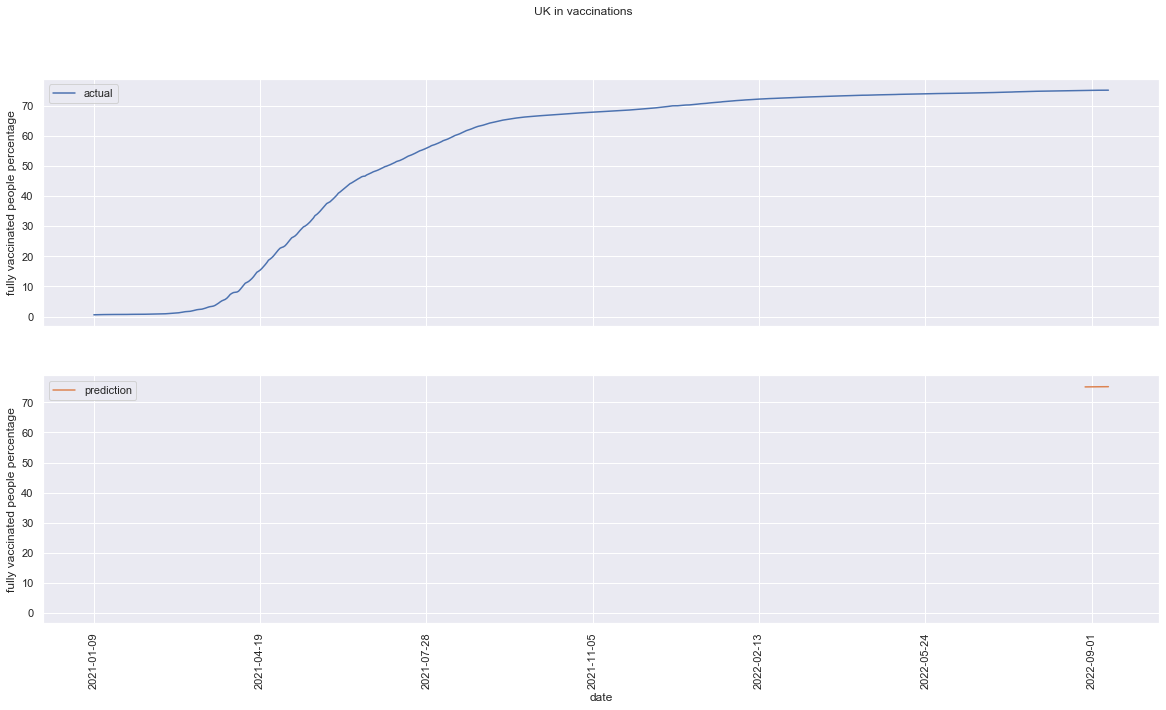

In [58]:
UK.plot(x='date',y=['actual','prediction'], figsize=(20,10),
            ylabel='fully vaccinated people percentage',rot=90, title="UK in vaccinations",subplots=True,sharex=True,sharey=True)
plt.show()